# Numerische Integration

## Auftrag
* Beschreiben Sie den Begriff des bestimmten Integrals.
* Beschreiben Sie die Sehnentrapezregel, die Tangententrapezregel und die Simpsonsche Regel als Näherungsformel für die Berechnung bestimmter Integrale.
* Erstellen Sie drei Python-Funktionen zur Approximation des Integrals $\int_{a}^{b} f(x) dx$ dabei steht $n$ für die Anzahl Streifen (bzw. Doppelstreifen bei Simpson) in den Approximationen.
  * `sekanten_trapez_regel(f, a, b, n)`
  * `tangenten_trapez_regel(f, a, b, n)`
  * `simpson_regel(f, a, b, n)`
* Verwenden Sie die drei Approximationsregeln zur Bestimmung der folgenden Integrale (Varieren Sie dabei die Anzahl Streifen $n$):
  * $\int_{0}^{\pi} sin(x) dx$
  * $\int_{-1}^{1} \sqrt{1-x^2} dx$
  * $\int_{0}^{1} x^2 dx$
* Stellen Sie Vermutungen auf, was beim Grenzwert $n\to\infty$ passiert.
* Überprüfen Sie Ihre Vermutungen mit Sympy.
* Vergleichen Sie die Genauigkeit der gemachten Approximationen.

## Umgebung
Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.
* SymPy
* PrettyTable
* Matplotlib
* NumPy


In [1]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [2]:
 pip install PTable

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### SymPy
**SymPy** ist eine Python-Programmierbibliothek für symbolische mathematische Berechnungen.
### PrettyTable
**PrettyTable** ist eine Python-Programmierbibliothek, die es ermöglicht einfache ASCII-Tabellen mittels Python zu generieren.
### Matplotlib
Bei **Matplotlib** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. **Matplotlib** ermöglicht eine graphische Darstellung sämtlicher mathematischen Funktionen und vielem mehr. Die erstellten Graphen können mit wenig Aufwand so konfiguriert werden, dass sie für fast alle Anwendungsbereiche geeignet sind.
### NumPy
Bei **NumPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht eine einfache Handhabung von grossen mehrdimensionalen Arrays. Dazu bietet NumPy effiziente Implementierungen von mathematischen Funktionen.

## Bestimmtes Integral
Die Integralrechnung gehört zu den wichtigsten Zweigen der Analysis. Mittels einem Integral können Flächenstücke zwischen dem Funktionsgraphen und der x-Achse berechnet werden. Das Integral ist ein Oberbegriff für das unbestimmte und das bestimmte Integral.  
Das bestimmte Integral einer Funktion ordnet dieser einer Zahl zu und wird verwendet, wenn für eine Funktion keine Stammfunktion bestimmt werden kann. Weiter kann das bestimmte Integral verwendet werden, wenn nur Messpunkte und keine Funktion vorliegt. Es gibt verschiedene numerische Methoden für die Berechung bestimmter Integrale. In dieser Arbeit wird auf die folgenden Methoden eingegangen:    

* Trapezregel
* Simpsonische Regel  

Beim bestimmten Integral wird der Inhalt der Fläche unter einem Graphen im Intervall $a \leq x \leq b$ bestimmt.  

![Bild 1](img/Integral.png)   
"[Bild 1] Darstellung des Integrals als Flächeninhalt $S$ unter dem Graphen einer Funktion $f$ im bestimmten Integrationsbereich von $a$ bis $b$"  

Das unbestimmte Integral einer Funktion ordnet dieser eine Menge von Funktionen zu, deren Elemente Stammfunktionen genannt werden. Dabei besitzt ein unbestimmtes Integral im Gegensatz zum bestimmten Integral keine obere und untere Grenze. In dieser Arbeit wird nicht weiter auf das unbestimmte Integral eingegangen.

### Funktionen
Das folgende Snippet zeigt die in der Aufgabenstellung definierten Funktionen und die zu berechnede Fläche unterhalb der Funktion.
  * $\int_{0}^{\pi} sin(x) dx$
  * $\int_{-1}^{1} \sqrt{1-x^2} dx$
  * $\int_{0}^{1} x^2 dx$


In [52]:
import numpy as np


"""
Zu analysierende Funktionen bestehend aus:
* Funktion
* Start- und Endwerte
* Funktionslable
"""

def funktion_1(x): 
    return np.sin(x)

def funktion_2(x): 
    return np.sqrt(1-x**2)

def funktion_3(x): 
    return x**2

funktionen = [(funktion_1, 0, math.pi, r"$\int_a^b f(\sin(x))\mathrm{d}x$"), 
              (funktion_2, -1, 1, r"$\int_a^b f(\sqrt{1-x^2})\mathrm{d}x$"), 
              (funktion_3, 0, 1, r"$\int_a^b f(x^2)\mathrm{d}x$"),]

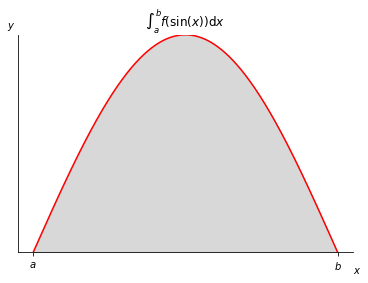

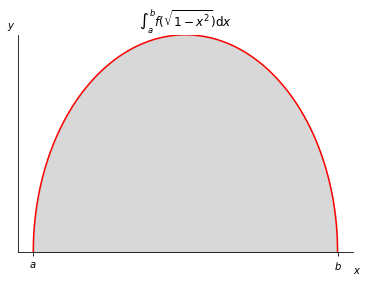

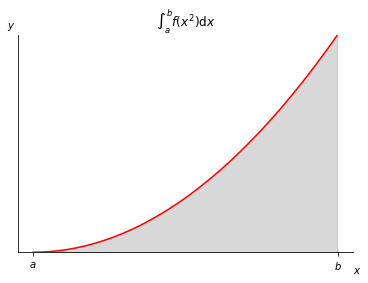

In [53]:
import matplotlib.pyplot as plt



for f, a, b, title in funktionen:
    x = np.linspace(a, b, 1000)
    
    fig, ax = plt.subplots()
    plt.title(title)
    fig.text(0.9, 0.05, '$x$')
    fig.text(0.1, 0.9, '$y$')
    
    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))
    ax.set_yticks([])
    ax.set_ylim(bottom=0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.xaxis.set_ticks_position('bottom')
    
    plt.fill_between(x, f(x), where = [(x > a and x < b) for x in x], color = 'grey', alpha = 0.3)
    
    plt.plot(x, f(x), '-r')
    plt.show()

## Trapezregel
Bei der Trapezregel wird die Fläche unter dem Gaphen im Bereich $a \leq x \leq b$ in $n$ gleich breite Teilintervalle aufgeteilt. Pro Intervall wird zwischen den beiden Eckpunkten $x_i$ und $x_{i+1}$ eine Gerade gezogen, damit ein Trapez ensteht. Je höher die Anzahl der Teilintervalle gewählt wird, desto genauer ist die Annäherung der Fläche.     
Die Trapezregel kann als Sehnentrapezformel oder Tangententrapezformel angewannt werden.

### Sehnentrapezformel
Bei der Sehnentrapezformel wird das Trapez aus der Grundlinie $[a,b]$, den senkrechten Geraden $[a, f(a)]$ und $[f(b)]$ sowie der Sehne als Verbindungsgerade zwischen $f(a)$ und $f(b)$ dargestellt. Die Sehne ersetzt an dieser Stelle die Kurve $f(x)$.  

![Bild 1](img/Sehnentrapezformel.png)  
"[Bild 1] Sehnentrapezformel"

Ein Trapez berechnet sich somit mit folgender Formel:  
$$Q(f)=\frac{a-b}{2}*(f(a)+f(b))$$  
Um das Integral noch besser annähern zu können, wird das Integrall $[a,b]$ in $n$ nebeneinanderliegende gleich grosse Teilintervalle der Länge $h$ geteilt. Für jedes einzelnes Teilintervall wendet man die Sehentrapezformel an und berechnet die Teilfläche und summiert diese Teilflächen zusammen.
Daraus ergibt sich die Sehentrapezformel:
$$Q(f)=h*(\frac{1}{2}*f(a)+\frac{1}{2}*f(b)+\sum_{i=1}^{n-1}f(a+i*h))$$  
$$h=\frac{b-a}{n}$$

### Implementierung der Sehnentrapezformel
Die Annäherung mittels der Sehnentrapezformel wurde im nachfolgenden Snippet `sekanten_trapez_regel(f, a, b, n)` umgesetzt.

In [21]:
def sekanten_trapez_regel(f, a, b, n):
    """ Berechnet die Fläche einer Funktion zur x-Achse zwischen a und b mit Hilfe der Sehnentrapezformel.
        @param: Funktion f: sympy-Funktion, die angenähert werden soll
        @param: float a: Start des Intervalls
        @param: float b: Ende des Intervalls
        @param: int n: Aufteilung des Intervalles
        @return: Fläche zwischen a und b unterhalb des Integrals
    """
    
    # Länge der Abschnitte berechnen
    delta_x = (b - a) / n

    # Summe aller Teilfunktionwerte berechnen
    summe = 0
    for i in range(1, n):
        summe += f(a + i*delta_x)
    
    # Zwischenschritte zusammenrechner (Sehnentrapezformel)
    return delta_x * (f(a)/2 + f(b)/2 + summe)

### Tangententrapezformel
Bei der Tangententrapezformel wird die obere Seite des Trapezes in der Mitte des Intervalles $[a,b]$ als Tangete von $f(x)$ gelegt. Die restlichen Seiten sind die Grundlinie $[a,b]$ und die senkrechte Gerande an der Stelle $a$ und $b$ bis zur Tangente.

![Bild 2](img/Tangententrapezformel.png) "[Bild 2] Tangententrapezformel"

Daraus ergibt sich die Tangententrapezformel:
$$Q(f)=(b-a)*f(\frac{a+b}{2})$$  
Wie bei der Sehnentrapezformel wird auch hier um eine bessere Annäherung zu erreichen das Intervall $[a,b]$ in $n$ nebeneinanderliegendne gleich grosse Teilintervalle der Länge $h$ geteilt. Die einzelnen Teilflächen werden addiert, womit es eine genauere Näherung ergibt.  
Daraus ergibt sich die Tagententrapezformel:
$$Q(f)=h*\sum_{i=1}^{n}f(a+h*\frac{2i-1}{2})$$  
$$h=\frac{b-a}{n}$$

### Implementierung der Tangententrapezformel
Die Annäherung mittels der Tangententrapezformel wurde im nachfolgenden Snippet `tangenten_trapez_regel(f, a, b, n)` umgesetzt.

In [22]:
def tangenten_trapez_regel(f, a, b, n):
    """ Berechnet die Fläche einer Funktion zur x-Achse zwischen a und b mit Hilfe der Tangententrapezformel.
        @param: Funktion f: sympy-Funktion, die angenähert werden soll
        @param: float a: Start des Intervalls
        @param: float b: Ende des Intervalls
        @param: int n: Aufteilung des Intervalles
        @return: Fläche zwischen a und b unterhalb des Integrals
    """
    
    # Länge der Abschnitte berechnen
    delta_x = (b - a) / n

    # Summe aller Teilfunktionwerte berechnen
    summe = 0
    for i in range(1, n + 1):
        summe += f(a + delta_x * ((2*i - 1) / 2))
        
    # Zwischenschritte zusammenrechner (Tagententrapezformel)
    return delta_x*summe

## Simpsonsche Regel
Die Simpsonsche Regel funktioniert ähnlich wie die Trapezregel. Hier werden jedoch die Eckpunkte nicht durch eine Gerade, sondern durch eine Parabel verbunden. Somit wird in der Regel eine bessere Annäherung der Fläche gegenüber der Trapezregel erzielt.  

![Bild 3](img/Simpsonscheregel.png)  
"[Bild 3] Simpsonsche Regel"

Ein Intervall lässt sich berechnen mit:  
$$Q(f)=\frac{b-a}{6}*(f(a)+4*f(\frac{a+b}{2})+f(b))$$  
Um die gesamte Fläche im Intervall zu erhalten, müssen die einzelnen Intervalle ebenfalls wieder als Summe berechnet werden:  
$$Q(f)=\frac{h}{3}*(\frac{1}{2}*f(x_0)+\sum_{k=1}^{n-1}f(x_k)+2*\sum_{k=1}^{n}f(\frac{x_{k-1}+x_k}{2})+\frac{1}{2}*f(x_n))$$  
$$h=\frac{b-a}{n}, x_k=a+k*h$$

### Implementierung der Simpsonsche Regel
Die Annäherung mittels der Simpsonschen Regel wurde im nachfolgenden Snippet `simpson_regel(f, a, b, n)` umgesetzt.

In [30]:
def simpson_regel(f, a, b, n):
    """ Berechnet die Fläche einer Funktion zur x-Achse zwischen a und b mit Hilfe der Simpsonsche Regel.
        @param: Funktion f: sympy-Funktion, die angenähert werden soll
        @param: float a: Start des Intervalls
        @param: float b: Ende des Intervalls
        @param: int n: Aufteilung des Intervalles
        @return: Fläche zwischen a und b unterhalb des Integrals
    """
        
    # Länge der Abschnitte berechnen
    delta_x = (b - a) / n
    
    # Summe erster Teilfunktionwerte berechnen
    summe_1 = 0
    for k in range(1, n):
        summe_1 += f(a + k*delta_x)
        
    # Summe zweiter Teilfunktionwerte berechnen
    summe_2 = 0
    for k in range(1, n + 1):
        xk = (a + k*delta_x)
        xk_1 = (a + (k-1)*delta_x)
        summe_2 += f((xk_1 + xk) / 2)
    
    # Zwischenschritte zusammenrechner (Simpsonsche Regel)
    return (delta_x/3) * (f(a)/2 + summe_1 + 2*summe_2 + f(b)/2) 

## Approximationsregeln miteinander vergleichen
Für den Vergleich werden die drei Funktionen der Aufgabenstellung verwendet und jeweils die Fläche des Integrals bei varierender Anzahl an Abschnitten berechnet.  
  * `funktion_1`: $\int_{0}^{\pi} sin(x) dx$
  * `funktion_2`: $\int_{-1}^{1} \sqrt{1-x^2} dx$
  * `funktion_3`: $\int_{0}^{1} x^2 dx$


In [57]:
import numpy as np
from prettytable import PrettyTable

"""
Berechnet für die definierten Funktionen die Flächen für die festgelegten Abschnitte. 
Berechnung erfolgt für jede Funktion mittels:
* Sehnentrapezformel
* Tangententrapezformel
* Simpsonsche Regel
Die Dahrstellung der Resultate erfolgt tabellarisch.
@param: list abschnitte: Berechnung der Fläche mittels der Anzahl an Abschnitten
"""

abschnitte = [1, 2, 4, 8, 16, 32, 64, 128, 265, 512, 1024, 2048, 4096, 8192]

for f, a, b, lable in funktionen:
    sehnentrapezformel = list()
    tangententrapezformel = list()
    simpsonsche_regel = list()

    # Tabelle initialisieren
    tabelle = PrettyTable()
    tabelle.field_names = ["Abschnitte", "Sehnentrapezformel", "Tangententrapezformel", "Simpsonsche Regel"]
    
    # Berechnung für jede Formel und Abschnitt durchführen
    for index, value in enumerate(abschnitte):
        sehnentrapezformel.append(sekanten_trapez_regel(f, a, b, value))
        tangententrapezformel.append(tangenten_trapez_regel(f, a, b, value))
        simpsonsche_regel.append(simpson_regel(f, a, b, value))
        tabelle.add_row([value, 
                         '{:.8f}'.format(float(sehnentrapezformel[index])),
                         '{:.8f}'.format(float(tangententrapezformel[index])),  
                         '{:.8f}'.format(float(simpsonsche_regel[index]))])
    
    # Tabelle darstellen und löschen füf nächste Funktion
    print(tabelle)
    tabelle.clear_rows()

+------------+--------------------+-----------------------+-------------------+
| Abschnitte | Sehnentrapezformel | Tangententrapezformel | Simpsonsche Regel |
+------------+--------------------+-----------------------+-------------------+
|     1      |     0.00000000     |       3.14159265      |     2.09439510    |
|     2      |     1.57079633     |       2.22144147      |     2.00455975    |
|     4      |     1.89611890     |       2.05234431      |     2.00026917    |
|     8      |     1.97423160     |       2.01290909      |     2.00001659    |
|     16     |     1.99357034     |       2.00321638      |     2.00000103    |
|     32     |     1.99839336     |       2.00080342      |     2.00000006    |
|     64     |     1.99959839     |       2.00020081      |     2.00000000    |
|    128     |     1.99989960     |       2.00005020      |     2.00000000    |
|    265     |     1.99997658     |       2.00001171      |     2.00000000    |
|    512     |     1.99999373     |     

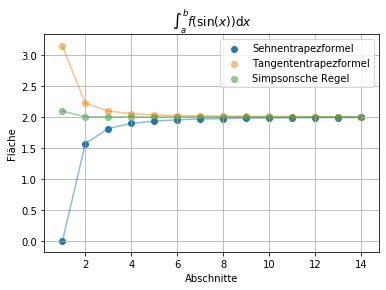

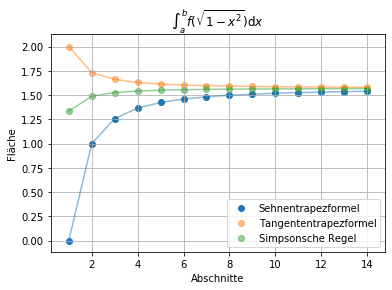

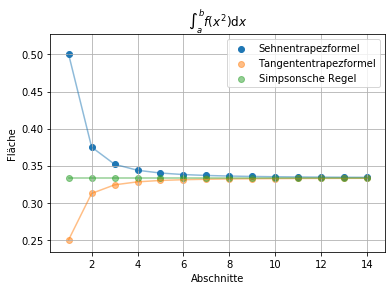

In [60]:
import matplotlib.pyplot as plt

"""
Berechnet für die definierten Funktionen die Flächen für die festgelegten Abschnitte. 
Berechnung erfolgt für jede Funktion mittels:
* Sehnentrapezformel
* Tangententrapezformel
* Simpsonsche Regel
Die Dahrstellung der Resultate erfolgt mittels eines Scatterplots.
@param: list abschnitte: Berechnung der Fläche mittels der Anzahl an Abschnitten
"""

abschnitte = range(1,15)

for f, a, b, lable in funktionen:
    sehnentrapezformel = list()
    tangententrapezformel = list()
    simpsonsche_regel = list()

    # Berechnung für jede Formel und Abschnitt durchführen
    for index, value in enumerate(abschnitte):
        sehnentrapezformel.append(sekanten_trapez_regel(f, a, b, value))
        tangententrapezformel.append(tangenten_trapez_regel(f, a, b, value))
        simpsonsche_regel.append(simpson_regel(f, a, b, value))
            
    # Scatterplot erstellen
    plt.title(lable)
    plt.xlabel('Abschnitte')
    plt.ylabel('Fläche')
    plt.grid(True)
    
    plt.scatter(abschnitte, sehnentrapezformel, label="Sehnentrapezformel")
    plt.plot(abschnitte, sehnentrapezformel, alpha=0.5)
    plt.scatter(abschnitte, tangententrapezformel, label="Tangententrapezformel", alpha=0.5)  
    plt.plot(abschnitte, tangententrapezformel, alpha=0.5)
    plt.scatter(abschnitte, simpsonsche_regel, label="Simpsonsche Regel", alpha=0.5) 
    plt.plot(abschnitte, simpsonsche_regel, alpha=0.5)
    
    plt.legend()
    plt.show()

Wie in den Tabellen zu sehen ist, ist jeweils die Simpsonsche Regel mit weniger Abschnitten gennauer als die Trapezregeln. Dies deckt sich auch mit der Aussage aus dem Paper (Mathi.uni-heidelberg). Ebenfalls ist gut ersichtlich, dass sich bei allen drei Verfahren der Fehler minimieren lässt, indem eine höhere Anzahl an Teilintervallen $n$ gewählt wird. Das gleiche Verhalten ist in den Grafiken wiederzufinden. Spannend ist, dass sich die *Tangententrapezformel* und *Sehnentrapezformel* annähern, jedoch nie von der gleichen Seite aus.

## Grenzwerte von $n\to\infty$
TODO

Daraus ergibt sich die Sehentrapezformel:
$$Q(f)=h*(\frac{1}{2}*f(a)+\frac{1}{2}*f(b)+\sum_{i=1}^{n-1}f(a+i*h))$$  
$$h=\frac{b-a}{n}$$

In [16]:
x = sp.Symbol('x')

funktion_1 = sp.sin(x)
sp.integrate(funktion_1, (x, 0, sp.pi))

2

In [19]:
x = sp.Symbol('x')

funktion_2 = sp.sqrt(1-x**2)
sp.integrate(funktion_2, (x, -1, 1))

pi/2

In [20]:
x = sp.Symbol('x')

funktion_2 = x**2
sp.integrate(funktion_2, (x, 0, 1))

1/3

## Fazit
TODO
Python ist eine erstaunliche Programmiersprache. Im Laufe dieses Moduls war ich immer wieder überrascht wie einfach und schnell man mathematische Probleme damit lösen kann. Besonders gut gefallen hat mir, wie einfach man sie als Einsteiger lernen kann, sie aber trotzdem auch für fortgeschrittene Anwender noch einiges zu bieten hat. Die vielen Libraries unterstützen den Anwender dabei, bereits bekannte Probleme schnell und effizient zu lösen. Da zahlreiche Lösungen abgerufen werden können, muss man diese nicht jedes Mal von Neuem programmieren.

## Litaraturverzeichnis
https://mathepedia.de/Trapezregel.html  
https://mathepedia.de/Simpsonsche_Formel.html  
https://de.wikipedia.org/wiki/Simpsonregel  
https://de.wikipedia.org/wiki/Numerische_Integration#/media/Datei:Integral_as_region_under_curve.svg  
Matplotlib. (2019). *Matplotlib*. Abgerufen am 19.03.2020 von https://matplotlib.org/  
https://pypi.org/project/PTable/   
https://www.sympy.org/en/index.html  
https://www.mathi.uni-heidelberg.de/~thaeter/anasem08/Isenhardt.pdf